<a href="https://colab.research.google.com/github/shouki123456789/Algorithmic_Trading/blob/main/algotrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algorithmic Trading Strategy**
Objective: Develop and test an algorithmic trading strategy.

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from tabulate import tabulate

In [ ]:
# Load Dataset
data = yf.download('RELIANCE.NS')
data.to_csv('RELIANCE.csv')
data = pd.read_csv('/content/RELIANCE.csv',parse_dates=['Date'], index_col='Date')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Dataset First Look
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,15.859429,15.944529,15.754989,15.917452,10.441108,48051995
1996-01-02,15.878770,15.956133,15.677626,15.793671,10.359914,77875009
1996-01-03,16.052837,16.783918,15.878770,15.913584,10.438569,96602936
1996-01-04,15.762726,15.813012,15.553845,15.766594,10.342154,100099436
1996-01-05,15.704703,15.704703,15.522900,15.658285,10.271105,76935930


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-05,2602.899902,2619.850098,2598.000000,2607.699951,2607.699951,4043203
2024-01-08,2610.000000,2631.949951,2568.949951,2587.350098,2587.350098,3867326
2024-01-09,2600.000000,2606.800049,2577.199951,2580.500000,2580.500000,2701537
2024-01-10,2577.000000,2659.000000,2575.050049,2650.100098,2650.100098,5551370
2024-01-11,2659.000000,2725.000000,2657.000000,2719.800049,2719.800049,11861842


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7044 entries, 1996-01-01 to 2024-01-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7044 non-null   float64
 1   High       7044 non-null   float64
 2   Low        7044 non-null   float64
 3   Close      7044 non-null   float64
 4   Adj Close  7044 non-null   float64
 5   Volume     7044 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 385.2 KB


<Axes: xlabel='Date'>

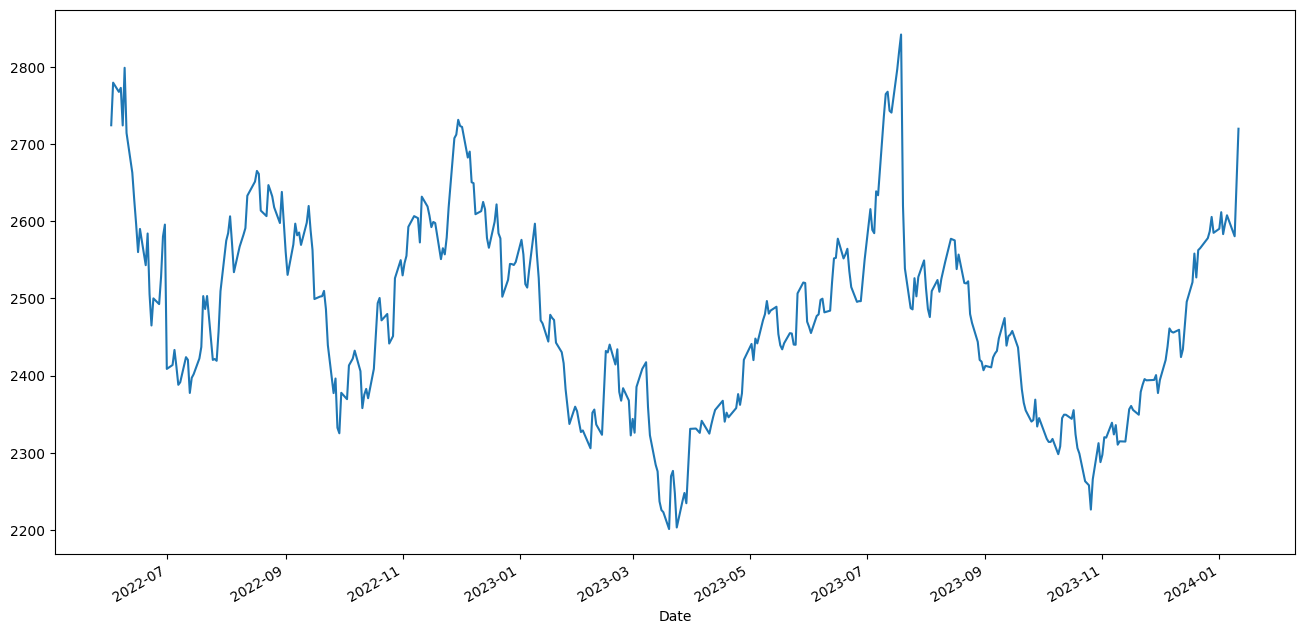

In [ ]:
#display the line plot of the last 400 closing prices
data[-400:].Close.plot(figsize= (16,8))

In [ ]:
data['20SMA'] = data.Close.rolling(window=20, min_periods=1).mean()
data['50SMA'] = data.Close.rolling(window=50, min_periods=1).mean()

In [ ]:
data['signal'] = 0
data['signal'] = np.where(data['20SMA'] >data['50SMA'], 1, 0)

In [ ]:
#calculates the difference between consecutive elements in the 'signal' column
data['Position'] = data.signal.diff()

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,20SMA,50SMA,signal,Position
Date,,,,,,,,,,
1996-01-01,15.859429,15.944529,15.754989,15.917452,10.441108,48051995,15.917452,15.917452,0,NaN
1996-01-02,15.878770,15.956133,15.677626,15.793671,10.359914,77875009,15.855561,15.855561,0,0.0
1996-01-03,16.052837,16.783918,15.878770,15.913584,10.438569,96602936,15.874902,15.874902,0,0.0
1996-01-04,15.762726,15.813012,15.553845,15.766594,10.342154,100099436,15.847825,15.847825,0,0.0
1996-01-05,15.704703,15.704703,15.522900,15.658285,10.271105,76935930,15.809917,15.809917,0,0.0


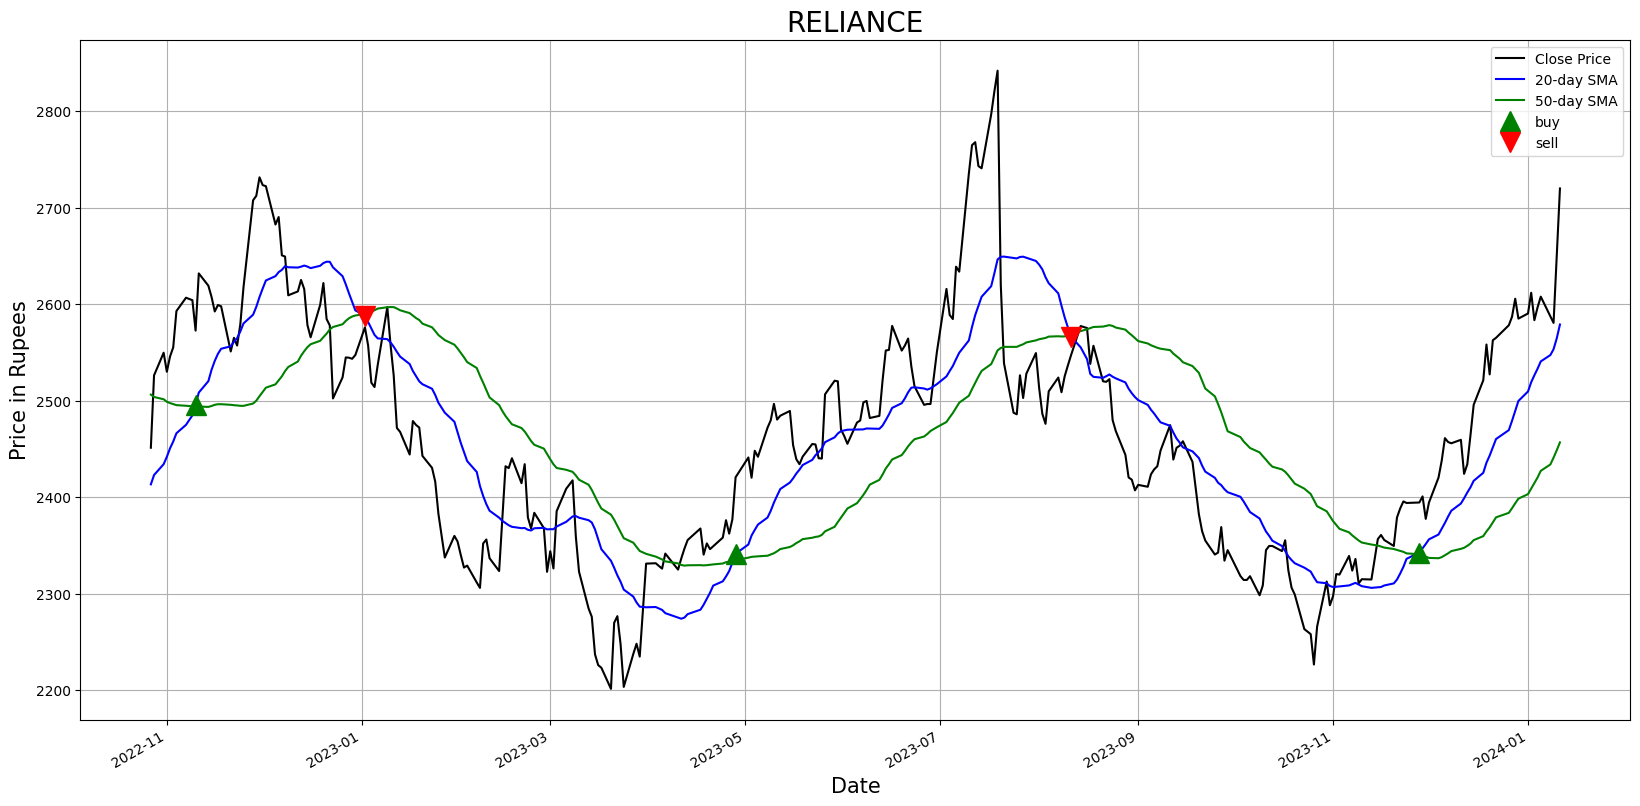

In [ ]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages
data.iloc[-300:]['Close'].plot(color = 'k', label= 'Close Price')
data.iloc[-300:]['20SMA'].plot(color = 'b',label = '20-day SMA')
data.iloc[-300:]['50SMA'].plot(color = 'g', label = '50-day SMA')
# plot ‘buy’ signals
plt.plot(data.iloc[-300:][data.iloc[-300:]['Position'] == 1].index,
         data.iloc[-300:]['20SMA'][data.iloc[-300:]['Position'] == 1],
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(data.iloc[-300:][data.iloc[-300:]['Position'] == -1].index,
         data.iloc[-300:]['20SMA'][data.iloc[-300:]['Position'] == -1],
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('RELIANCE', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [ ]:
# algorithmic trading strategy(golden cross over strategy)
def GoldenCrossverSignal(name):
    path = f'/content/{name}.csv'
    data = pd.read_csv(path, parse_dates=['Date'], index_col='Date')

    # Calculate the previous day's closing price
    data['Prev_Close'] = data.Close.shift(1)

    # Calculate the 20-day and 50-day Simple Moving Averages
    data['20SMA'] = data.Prev_Close.rolling(window=20, min_periods=1).mean()
    data['50SMA'] = data.Prev_Close.rolling(window=50, min_periods=1).mean()

    data['Signal'] = 0

    # Generate a signal based on the golden cross
    data['Signal'] = np.where(data['20SMA'] > data['50SMA'], 1, 0)

    # Calculate the position by taking the difference of consecutive signals
    data['Position'] = data.Signal.diff()

     # Extract rows where a position change occurs (Buy or Sell signals)
    df_pos = data[(data['Position'] == 1) | (data['Position'] == -1)].copy()

    # Convert numerical position values to 'Buy' or 'Sell'
    df_pos['Position'] = df_pos['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
    return df_pos

In [ ]:
data = GoldenCrossverSignal('RELIANCE')
data

,Open,High,Low,Close,Adj Close,Volume,Prev_Close,20SMA,50SMA,Signal,Position
Date,,,,,,,,,,,
1996-02-16,17.638781,17.812847,17.487923,17.623306,11.560070,228740914,17.940496,15.102045,15.003771,1,Buy
1996-04-05,16.137936,16.137936,16.137936,16.137936,10.585735,0,16.137936,16.335406,16.426888,0,Sell
1996-04-24,19.116415,19.967409,19.046787,19.750792,12.955602,246856146,18.269289,16.905378,16.886192,1,Buy
1996-06-18,18.644501,18.644501,18.033333,18.253817,12.471021,88215860,18.733467,18.655911,18.665465,0,Sell
1996-08-13,16.052837,16.319740,15.998683,16.188223,11.059805,90655654,16.095387,16.704234,16.701681,1,Buy
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-11,2600.000000,2636.000000,2588.000000,2631.800049,2622.536133,5681124,2572.500000,2495.482507,2493.158008,1,Buy
2023-01-03,2565.050049,2573.000000,2547.800049,2557.050049,2548.049316,3534596,2575.899902,2588.090015,2589.682017,0,Sell
2023-05-02,2436.199951,2445.800049,2428.100098,2441.050049,2432.457520,5991101,2420.500000,2341.220020,2334.862012,1,Buy


In [ ]:
df = data[(data.index >= data[data['Position'] == 'Buy'].index[0]) & (data.index <= data[data['Position'] == 'Sell'].index[-1])]

Backtest the strategy using historical data and evaluate its profitability

In [ ]:
#The class designed to store and manage backtesting results in a DataFrame
class Backtest:
    def __init__(self):

        # Define the columns for the backtesting DataFrame
        self.columns = ['Equity Name', 'Trade', 'Entry Time', 'Entry Price', 'Exit Time', 'Exit Price', 'Quantity', 'Position Size', 'PNL', '% PNL']

        # Create an empty DataFrame with the specified columns
        self.backtesting = pd.DataFrame(columns=self.columns)
    def buy(self, equity_name, entry_time, entry_price, qty):

        # Create a dictionary to store trade information
        self.trade_log = dict(zip(self.columns, [None] * len(self.columns)))

        # Set trade information for a long position opening
        self.trade_log['Trade'] = 'Long Open'
        self.trade_log['Quantity'] = qty
        self.trade_log['Position Size'] = round(self.trade_log['Quantity'] * entry_price, 3)
        self.trade_log['Equity Name'] = equity_name
        self.trade_log['Entry Time'] = entry_time
        self.trade_log['Entry Price'] = round(entry_price, 2)
    def sell(self, exit_time, exit_price, exit_type, charge):

        #Update the trade log when closing a long position
        self.trade_log['Trade'] = 'Long Closed'
        self.trade_log['Exit Time'] = exit_time
        self.trade_log['Exit Price'] = round(exit_price, 2)
        self.trade_log['Exit Type'] = exit_type
        self.trade_log['PNL'] = round((self.trade_log['Exit Price'] - self.trade_log['Entry Price']) * self.trade_log['Quantity'] - charge, 3)
        self.trade_log['% PNL'] = round((self.trade_log['PNL'] / self.trade_log['Position Size']) * 100, 3)
        self.trade_log['Holding Period'] = exit_time - self.trade_log['Entry Time']
        self.backtesting = self.backtesting.append(self.trade_log, ignore_index=True)
    #calculates and prints various statistics based on the backtesting results
    def stats(self):
        df = self.backtesting
        parameters = ['Total Trade Scripts', 'Total Trade', 'PNL',  'Winners', 'Losers', 'Win Ratio','Total Profit', 'Total Loss', 'Average Loss per Trade', 'Average Profit per Trade', 'Average PNL Per Trade', 'Risk Reward']
        total_traded_scripts = len(df['Equity Name'].unique())
        total_trade = len(df.index)
        pnl = df.PNL.sum()
        winners = len(df[df.PNL > 0])
        loosers = len(df[df.PNL <= 0])
        win_ratio = str(round((winners/total_trade) * 100, 2)) + '%'
        total_profit = round(df[df.PNL > 0].PNL.sum(), 2)
        total_loss  = round(df[df.PNL <= 0].PNL.sum(), 2)
        average_loss_per_trade = round(total_loss/loosers, 2)
        average_profit_per_trade = round(total_profit/winners, 2)
        average_pnl_per_trade = round(pnl/total_trade, 2)
        risk_reward = f'1:{-1 * round(average_profit_per_trade/average_loss_per_trade, 2)}'
        data_points = [total_traded_scripts,total_trade,pnl,winners, loosers, win_ratio, total_profit, total_loss, average_loss_per_trade, average_profit_per_trade, average_pnl_per_trade, risk_reward]
        data = list(zip(parameters,data_points ))
        print(tabulate(data, ['Parameters', 'Values'], tablefmt='psql'))

In [ ]:
bt = Backtest()
capital = 50000
for index, data in df.iterrows():
    if(data.Position == 'Buy'):
        qty = capital // data.Open
        bt.buy('RELIANCE', index, data.Open, qty)
    else:
        bt.sell(index, data.Open, 'Exit Trigger', 0)

<ipython-input-45-8f116cd7280f>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.backtesting = self.backtesting.append(self.trade_log, ignore_index=True)
<ipython-input-45-8f116cd7280f>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.backtesting = self.backtesting.append(self.trade_log, ignore_index=True)
<ipython-input-45-8f116cd7280f>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.backtesting = self.backtesting.append(self.trade_log, ignore_index=True)
<ipython-input-45-8f116cd7280f>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.backtesting = self.backtesting.append(self.trade_log, ignore_index=True)
<ipy

In [ ]:
bt.backtesting

,Equity Name,Trade,Entry Time,Entry Price,Exit Time,Exit Price,Quantity,Position Size,PNL,% PNL,Exit Type,Holding Period
0,RELIANCE,Long Closed,1996-02-16,17.64,1996-04-05,16.14,2834.0,49988.304,-4251.00,-8.504,Exit Trigger,49 days
1,RELIANCE,Long Closed,1996-04-24,19.12,1996-06-18,18.64,2615.0,49989.425,-1255.20,-2.511,Exit Trigger,55 days
2,RELIANCE,Long Closed,1996-08-13,16.05,1996-08-16,15.98,3114.0,49988.536,-217.98,-0.436,Exit Trigger,3 days
3,RELIANCE,Long Closed,1996-08-30,16.33,1996-09-17,14.93,3061.0,49990.246,-4285.40,-8.572,Exit Trigger,18 days
4,RELIANCE,Long Closed,1996-11-12,14.19,1996-11-21,14.12,3523.0,49999.314,-246.61,-0.493,Exit Trigger,9 days
...,...,...,...,...,...,...,...,...,...,...,...,...
84,RELIANCE,Long Closed,2022-03-29,2638.00,2022-05-27,2593.05,18.0,47484.000,-809.10,-1.704,Exit Trigger,59 days
85,RELIANCE,Long Closed,2022-06-13,2650.00,2022-07-01,2574.90,18.0,47700.000,-1351.80,-2.834,Exit Trigger,18 days
86,RELIANCE,Long Closed,2022-08-18,2660.00,2022-09-28,2360.35,18.0,47880.000,-5393.70,-11.265,Exit Trigger,41 days
87,RELIANCE,Long Closed,2022-11-11,2600.00,2023-01-03,2565.05,19.0,49400.000,-664.05,-1.344,Exit Trigger,53 days


In [ ]:
bt.stats()

+--------------------------+------------+
| Parameters               | Values     |
|--------------------------+------------|
| Total Trade Scripts      | 1          |
| Total Trade              | 89         |
| PNL                      | 161285.19  |
| Winners                  | 34         |
| Losers                   | 55         |
| Win Ratio                | 38.2%      |
| Total Profit             | 330658.44  |
| Total Loss               | -169373.25 |
| Average Loss per Trade   | -3079.51   |
| Average Profit per Trade | 9725.25    |
| Average PNL Per Trade    | 1812.19    |
| Risk Reward              | 1:3.16     |
+--------------------------+------------+
